In [1]:
# import all libraries and modules
import tensorflow as tf 
import pandas as pd  
import numpy as np    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import ConvLSTM2D, Dropout
from tensorflow.keras.layers import TimeDistributed, RepeatVector
from tensorflow.keras.layers import Conv1D, MaxPool1D, LSTM, GRU
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
# tensorflow version
tf.__version__

'2.4.1'

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
fn = '/home/jefire/project/water/input/jide_q_h_data/jiderebode_q_imerge_data_2000_2021_corrected.csv'

In [5]:
df = pd.read_csv(fn)
df

,date,Pt-59,Rt-200,Tt,Tt-128,Tavgt-5,Tavgt-220,Q
0,2000-12-17,1.078531,806.219362,21.233590,29.549215,20.908853,29.107907,1653.02
1,2000-12-18,2.935496,804.297237,21.998173,30.130972,21.073988,29.061632,1654.00
2,2000-12-19,0.604258,803.991950,22.164326,30.165789,21.355321,29.015931,1655.49
3,2000-12-20,2.331717,797.908162,22.022490,29.426157,21.650093,28.968615,1665.17
4,2000-12-21,1.483530,785.448292,21.983952,29.681267,21.880506,28.922126,1671.33
...,...,...,...,...,...,...,...,...
7588,2021-09-26,9.375081,850.724998,31.067743,34.135807,30.547154,31.219590,2577.12
7589,2021-09-27,8.460711,851.382697,30.464815,34.440166,30.576849,31.252320,2546.40
7590,2021-09-28,12.678004,851.722579,30.405666,34.654995,30.686144,31.282351,2495.20
7591,2021-09-29,6.628835,856.254451,30.473732,34.584763,30.650376,31.310892,2444.00


In [6]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-59,Rt-200,Tt,Tt-128,Tavgt-5,Tavgt-220,Q
0,2000-12-17,1.078531,806.219362,21.233590,29.549215,20.908853,29.107907,1653.02
1,2000-12-18,2.935496,804.297237,21.998173,30.130972,21.073988,29.061632,1654.00
2,2000-12-19,0.604258,803.991950,22.164326,30.165789,21.355321,29.015931,1655.49
3,2000-12-20,2.331717,797.908162,22.022490,29.426157,21.650093,28.968615,1665.17
4,2000-12-21,1.483530,785.448292,21.983952,29.681267,21.880506,28.922126,1671.33
...,...,...,...,...,...,...,...,...
7588,2021-09-26,9.375081,850.724998,31.067743,34.135807,30.547154,31.219590,2577.12
7589,2021-09-27,8.460711,851.382697,30.464815,34.440166,30.576849,31.252320,2546.40
7590,2021-09-28,12.678004,851.722579,30.405666,34.654995,30.686144,31.282351,2495.20
7591,2021-09-29,6.628835,856.254451,30.473732,34.584763,30.650376,31.310892,2444.00


In [7]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-59,Rt-200,Tt,Tt-128,Tavgt-5,Tavgt-220,Q
0,2000-12-17,1.078531,806.219362,21.233590,29.549215,20.908853,29.107907,1653.02
1,2000-12-18,2.935496,804.297237,21.998173,30.130972,21.073988,29.061632,1654.00
2,2000-12-19,0.604258,803.991950,22.164326,30.165789,21.355321,29.015931,1655.49
3,2000-12-20,2.331717,797.908162,22.022490,29.426157,21.650093,28.968615,1665.17
4,2000-12-21,1.483530,785.448292,21.983952,29.681267,21.880506,28.922126,1671.33
...,...,...,...,...,...,...,...,...
7588,2021-09-26,9.375081,850.724998,31.067743,34.135807,30.547154,31.219590,2577.12
7589,2021-09-27,8.460711,851.382697,30.464815,34.440166,30.576849,31.252320,2546.40
7590,2021-09-28,12.678004,851.722579,30.405666,34.654995,30.686144,31.282351,2495.20
7591,2021-09-29,6.628835,856.254451,30.473732,34.584763,30.650376,31.310892,2444.00


In [8]:
# get summary statistics
df_copy.describe()

,Pt-59,Rt-200,Tt,Tt-128,Tavgt-5,Tavgt-220,Q
count,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000
mean,2.657530,533.845806,28.672347,28.610889,28.669870,28.618604,1281.968143
std,4.019726,333.294870,3.947313,3.946582,3.889909,1.684284,939.327426
min,0.000000,32.433393,16.909994,16.909994,17.671531,25.611789,0.000000
25%,0.024477,191.057605,26.036512,25.941437,26.054203,27.122918,297.310000
50%,0.630040,557.884627,29.643440,29.572302,29.742141,28.394578,1501.180000
75%,3.848723,847.039938,31.502096,31.448221,31.406092,30.236438,1854.710000
max,26.368990,1118.794074,35.947914,35.947914,35.587638,31.572935,5388.920000


In [9]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-9-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    7593
unique                   7593
top       2000-12-17 00:00:00
freq                        1
first     2000-12-17 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [10]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [11]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-59,Rt-200,Tt,Tt-128,Tavgt-5,Tavgt-220,Q
date,,,,,,,
2000-12-17,1.078531,806.219362,21.233590,29.549215,20.908853,29.107907,1653.02
2000-12-18,2.935496,804.297237,21.998173,30.130972,21.073988,29.061632,1654.00
2000-12-19,0.604258,803.991950,22.164326,30.165789,21.355321,29.015931,1655.49
2000-12-20,2.331717,797.908162,22.022490,29.426157,21.650093,28.968615,1665.17
2000-12-21,1.483530,785.448292,21.983952,29.681267,21.880506,28.922126,1671.33
...,...,...,...,...,...,...,...
2021-09-26,9.375081,850.724998,31.067743,34.135807,30.547154,31.219590,2577.12
2021-09-27,8.460711,851.382697,30.464815,34.440166,30.576849,31.252320,2546.40
2021-09-28,12.678004,851.722579,30.405666,34.654995,30.686144,31.282351,2495.20


In [12]:
# drop unwanted dates data
df_copy.drop(df_copy.loc[:'2000-12-31'].index,inplace=True)
df_copy.drop(df_copy.loc['2020-03-02':].index,inplace=True) 
df_copy

,Pt-59,Rt-200,Tt,Tt-128,Tavgt-5,Tavgt-220,Q
date,,,,,,,
2001-01-01,0.041924,737.693629,21.818512,29.886585,22.134039,28.360960,1710.00
2001-01-02,0.433780,734.971285,21.694710,29.683380,21.929688,28.310038,1714.40
2001-01-03,0.026396,728.195629,21.706347,30.388618,21.810697,28.257549,1718.00
2001-01-04,0.677911,724.527295,21.556520,30.492870,21.699811,28.204746,1722.28
2001-01-05,0.067499,721.478529,21.191872,30.478231,21.593592,28.146621,1725.98
...,...,...,...,...,...,...,...
2020-02-26,0.000131,472.778547,24.694689,30.047571,25.702100,26.968084,1691.40
2020-02-27,0.003936,470.743294,25.625881,30.938284,25.483558,26.946958,1683.80
2020-02-28,0.001539,466.697811,26.509964,30.924395,25.377235,26.928938,1661.00


In [13]:
# split data 70 : 15 : 15 (train, val, test)
# size = int(len(df_copy)*0.8)
size = int(len(df_copy)*0.85)

df_train_val = df_copy.iloc[:size]
df_test = df_copy.iloc[size:]

print(df_train_val.head())
print(df_test.head())
print(len(df_train_val))
print(len(df_test))

               Pt-59      Rt-200         Tt     Tt-128    Tavgt-5  Tavgt-220  \
date                                                                           
2001-01-01  0.041924  737.693629  21.818512  29.886585  22.134039  28.360960   
2001-01-02  0.433780  734.971285  21.694710  29.683380  21.929688  28.310038   
2001-01-03  0.026396  728.195629  21.706347  30.388618  21.810697  28.257549   
2001-01-04  0.677911  724.527295  21.556520  30.492870  21.699811  28.204746   
2001-01-05  0.067499  721.478529  21.191872  30.478231  21.593592  28.146621   

                  Q  
date                 
2001-01-01  1710.00  
2001-01-02  1714.40  
2001-01-03  1718.00  
2001-01-04  1722.28  
2001-01-05  1725.98  
               Pt-59     Rt-200         Tt     Tt-128    Tavgt-5  Tavgt-220  \
date                                                                          
2017-04-17  0.029612  58.638992  30.627996  24.541441  30.057551  27.045943   
2017-04-18  0.008613  58.637653  31.263472  24.8

In [14]:
# Display Pipeline
set_config(display='diagram')

In [15]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,6))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,6))
    ],remainder='passthrough')

In [16]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [17]:
#fit data
pipe.fit(df_train_val.iloc[:,:-1])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 6, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 6, None))]))])

In [18]:
# apply transform to train dataset
dataX = pipe.transform(df_train_val.iloc[:,:-1])
print(dataX[0])
print(dataX.shape)

[-0.57574077  0.34594113 -1.37952518  0.10628583 -1.33135222  0.01693925]
(5950, 6)


In [19]:
scaler = StandardScaler()
scaler.fit(df_train_val[['Q']])

StandardScaler()

In [20]:
# Let’s standardize data
dataY = scaler.transform(df_train_val[['Q']])
dataY[0]

array([0.57962369])

In [21]:
# let’s allow the model to see / train on the past 90 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90
horizon = 1
TRAIN_SPLIT = len(df_train_val) - len(df_test)  
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(x_train_multi.shape)
print(x_val_multi.shape)

Single window of past history
[[-5.75740774e-01  3.45941128e-01 -1.37952518e+00  1.06285826e-01
  -1.33135222e+00  1.69392469e-02]
 [-8.81084189e-02  3.40658294e-01 -1.41898100e+00  3.82368381e-02
  -1.37475302e+00 -2.11049371e-03]
 [-6.59115841e-01  3.24961431e-01 -1.41373871e+00  3.01298426e-01
  -1.40394549e+00 -2.19126324e-02]
 [ 2.65003968e-02  3.13355867e-01 -1.45019173e+00  3.43526811e-01
  -1.43856572e+00 -4.23435639e-02]
 [-4.80281469e-01  3.08851619e-01 -1.53524304e+00  3.38319510e-01
  -1.47150221e+00 -6.37677465e-02]
 [-1.06728057e+00  3.00548100e-01 -1.59917176e+00  2.51810378e-01
  -1.50950496e+00 -8.45014203e-02]
 [-1.89737586e-01  2.87609310e-01 -1.51771949e+00  2.65005130e-01
  -1.52669301e+00 -1.04775435e-01]
 [-1.89236761e-02  2.77177123e-01 -1.45029044e+00  7.17146016e-01
  -1.53442157e+00 -1.28423899e-01]
 [ 3.35409480e-01  2.64596173e-01 -1.41082164e+00  7.58553248e-01
  -1.52637962e+00 -1.49831123e-01]
 [ 8.90871598e-02  2.61491814e-01 -1.32689397e+00  4.10600163

In [22]:
# reshape input feature for ConvLSTM 
x_train_multi_ConvLSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 1,
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_ConvLSTM.shape)

x_val_multi_ConvLSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 1,
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_ConvLSTM.shape)

(4810, 2, 1, 45, 6)
(959, 2, 1, 45, 6)


In [23]:
# Prepare CovLSTM2D training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_ConvLSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_ConvLSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [24]:
# Define the ConvLSTM model

ConvLSTM_model = Sequential()
ConvLSTM_model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', 
input_shape=(2, 1, x_train_multi_ConvLSTM.shape[3], x_train_multi_ConvLSTM.shape[4])))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Flatten())
ConvLSTM_model.add(Dense(30, activation='relu'))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Dense(horizon))
ConvLSTM_model.compile(optimizer='adam', loss='mse')

In [25]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/ConvLSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined.h5'

In [26]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = ConvLSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 12s 36ms/step - loss: 0.3150 - val_loss: 0.1655
Epoch 2/500
150/150 [==============================] - 3s 20ms/step - loss: 0.1225 - val_loss: 0.1236
Epoch 3/500
150/150 [==============================] - 3s 20ms/step - loss: 0.0876 - val_loss: 0.1172
Epoch 4/500
150/150 [==============================] - 3s 20ms/step - loss: 0.0818 - val_loss: 0.1019
Epoch 5/500
150/150 [==============================] - 3s 20ms/step - loss: 0.0783 - val_loss: 0.0989
Epoch 6/500
150/150 [==============================] - 3s 20ms/step - loss: 0.0655 - val_loss: 0.1029
Epoch 7/500
150/150 [==============================] - 3s 20ms/step - loss: 0.0596 - val_loss: 0.1071
Epoch 8/500
150/150 [==============================] - 3s 20ms/step - loss: 0.0541 - val_loss: 0.1161
Epoch 9/500
150/150 [==============================] - 3s 20ms/step - loss: 0.0549 - val_loss: 0.1230
Epoch 10/500
150/150 [==============================] - 3s 20ms/step - loss: 0.05

In [27]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

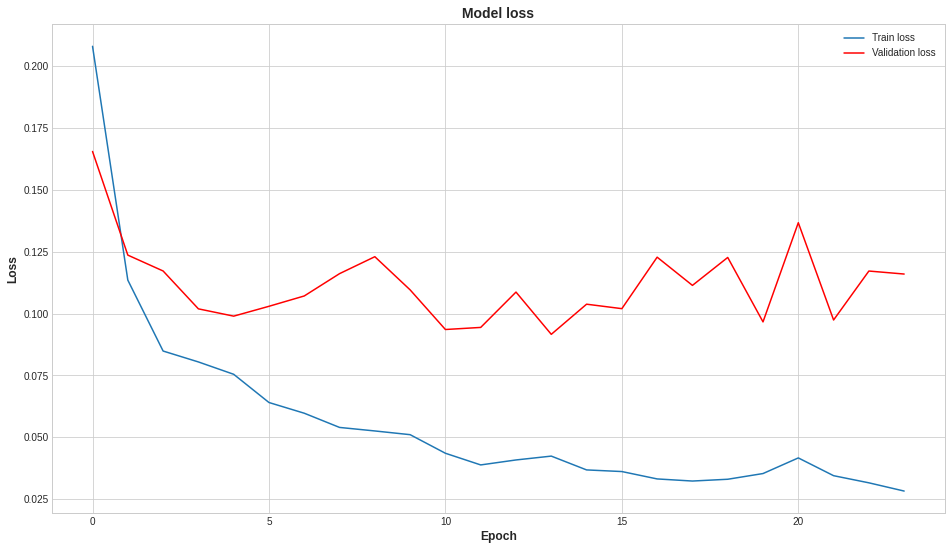

<Figure size 1152x648 with 0 Axes>

In [28]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [29]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 43, 64)         54016     
_________________________________________________________________
dropout (Dropout)            (None, 1, 43, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2752)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                82590     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 136,637
Trainable params: 136,637
Non-trainable params: 0
__________________________________________________

In [30]:
# assign the number of days to validate model
val_period = len(df_test) - hist_window - horizon
val_period

959

In [31]:
# hold back 5 years data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test.iloc[:,:].tail(val_period)

In [32]:
# apply transform to test dataset
validateX = pipe.transform(df_test.iloc[:,:-1])

print(validateX[0])
print(validateX.shape)

[-0.63553057 -1.99898065  0.39488514 -0.89826299  0.16540218 -0.68487759]
(1050, 6)


In [33]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]

array([-1.2802926])

In [34]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(x_test_multi.shape)

Single window of past history
[[-6.35530570e-01 -1.99898065e+00  3.94885139e-01 -8.98262986e-01
   1.65402182e-01 -6.84877590e-01]
 [-9.18356879e-01 -1.99904968e+00  6.25766484e-01 -8.60199061e-01
   2.84978957e-01 -6.75732334e-01]
 [-1.05913798e+00 -2.03082772e+00  8.41210115e-01 -8.59401386e-01
   4.84955291e-01 -6.68520816e-01]
 [-8.58941316e-01 -2.21377513e+00  1.05786947e+00 -7.95742988e-01
   6.71131565e-01 -6.62244437e-01]
 [-1.49035371e+00 -2.24449469e+00  1.13736613e+00 -7.85741993e-01
   8.18870641e-01 -6.53437431e-01]
 [-5.55441325e-01 -2.27695906e+00  1.07167377e+00 -9.21505965e-01
   9.36478009e-01 -6.44298073e-01]
 [-3.71610180e-01 -2.24992367e+00  1.15716988e+00 -1.04036506e+00
   1.04498562e+00 -6.35527764e-01]
 [-3.33964881e-01 -2.22816039e+00  1.44449442e+00 -1.01234588e+00
   1.17553554e+00 -6.25250580e-01]
 [-4.37798916e-01 -2.33289630e+00  1.86487043e+00 -9.32192829e-01
   1.33582592e+00 -6.11392312e-01]
 [-5.34556737e-01 -2.30831336e+00  1.66341120e+00 -8.78909430

In [35]:
# reshape for ConvLSTM2D
x_test_multi_ConvLSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 1,
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(f'x_test_multi_ConvLSTM shape is : {x_test_multi_ConvLSTM.shape}')

x_test_multi_ConvLSTM shape is : (959, 2, 1, 45, 6)


In [36]:
# predictions for ConvLSTM2D

predictions = []
for i in x_test_multi_ConvLSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2], i.shape[3])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.31709093]]


In [37]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(959, 1)


In [38]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[922.68286]
(959, 1)


In [39]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.79765245]
KGE' is : [0.85802293]
r is : [0.90837109], gamma is : [0.99355067]
KGE is : [0.81802686]
alpha is : [0.88598979], beta is : [0.89174088]
PBIAS is : [10.82591208]
RMSE is : 460.0166613692728
MARE is : [0.20824081]
MSE is : 211615.3287373322
MAE is : 323.13536759751884
MAPE is : inf
R2 is : 0.7976524466675218



<ipython-input-39-116afa56ab94>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


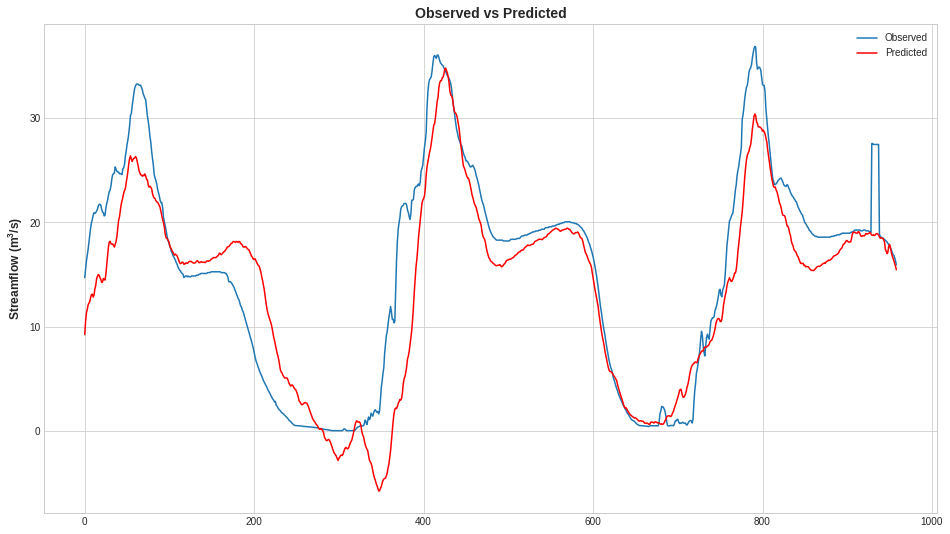

<Figure size 1152x648 with 0 Axes>

In [40]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['Q'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Streamflow (m$\mathregular{^{3}}$/s)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [41]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/ConvLSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined_history.csv', index=False)

In [42]:
# Bidirectional LSTM Model

In [43]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [44]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, activation='relu',
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu')),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [45]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined.h5'

In [46]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 62s 389ms/step - loss: 0.3269 - val_loss: 0.1367
Epoch 2/500
150/150 [==============================] - 57s 383ms/step - loss: 235656655093.5726 - val_loss: 0.9735
Epoch 3/500
150/150 [==============================] - 58s 385ms/step - loss: 9.0949 - val_loss: 0.9535
Epoch 4/500
150/150 [==============================] - 57s 382ms/step - loss: 1.4764 - val_loss: 0.9241
Epoch 5/500
150/150 [==============================] - 57s 383ms/step - loss: 1.3599 - val_loss: 0.8781
Epoch 6/500
150/150 [==============================] - 58s 387ms/step - loss: 1.2557 - val_loss: 0.6185
Epoch 7/500
150/150 [==============================] - 57s 382ms/step - loss: 0.9527 - val_loss: 0.4936
Epoch 8/500
150/150 [==============================] - 57s 380ms/step - loss: 0.8508 - val_loss: 0.4187
Epoch 9/500
150/150 [==============================] - 57s 382ms/step - loss: 0.7332 - val_loss: 0.3688
Epoch 10/500
150/150 [==============================]

In [47]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

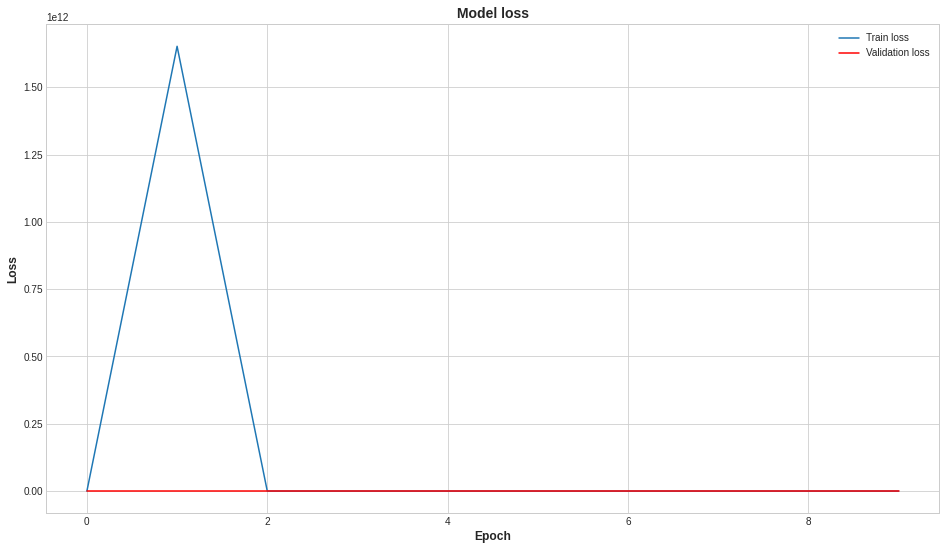

<Figure size 1152x648 with 0 Axes>

In [48]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [49]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 90, 300)           188400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 330,841
Trainable params: 330,841
Non-trainable params: 0
_________________________________________________________________


In [50]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.5613349]]


In [51]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(959, 1)


In [52]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[708.2362]
(959, 1)


In [53]:
# correct evaluation metrics

# Define the time-series evaluation function for Bidirectional LSTM

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.75822476]
KGE' is : [0.8169127]
r is : [0.90238978], gamma is : [0.93890414]
KGE is : [0.7397857]
alpha is : [0.80526114], beta is : [0.85766061]
PBIAS is : [14.23393865]
RMSE is : 502.8407784892501
MARE is : [0.2367947]
MSE is : 252848.8485116751
MAE is : 367.44355345004493
MAPE is : inf
R2 is : 0.7582247648856362



<ipython-input-53-79476d44aa44>:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


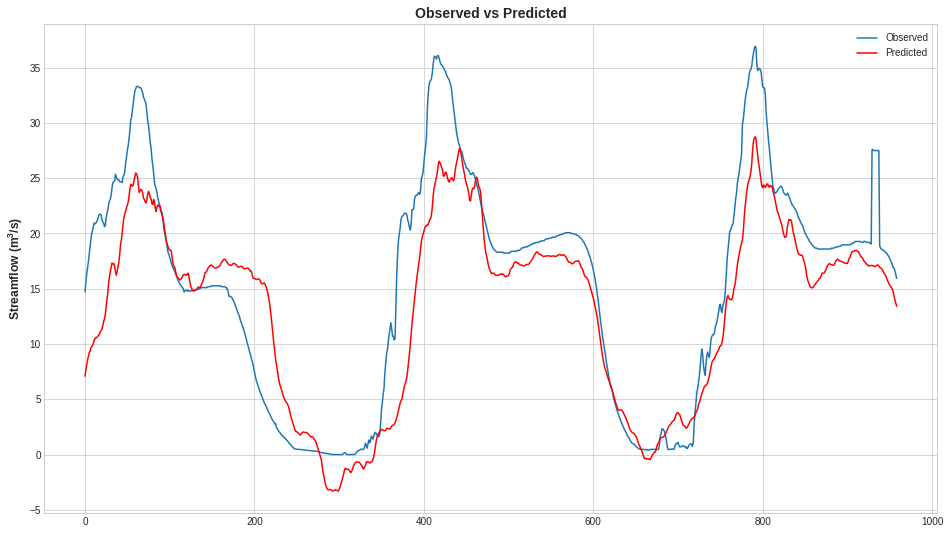

<Figure size 1152x648 with 0 Axes>

In [54]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['Q'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Streamflow (m$\mathregular{^{3}}$/s)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [55]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined_history.csv', index=False)

In [56]:
# Hybrid CNN LSTM Model

In [57]:
# reshape input feature for Hybrid CNN LSTM 
x_train_multi_CNN_LSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_LSTM.shape)

x_val_multi_CNN_LSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_LSTM.shape)

(4810, 2, 45, 6)
(959, 2, 45, 6)


In [58]:
# Prepare  CNN LSTM training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_LSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_LSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [59]:
# Define the CNN LSTM model

CNN_LSTM_model = Sequential()
CNN_LSTM_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_LSTM.shape[2], x_train_multi_CNN_LSTM.shape[3]))))
CNN_LSTM_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_LSTM_model.add(TimeDistributed(Dropout(0.2)))
CNN_LSTM_model.add(TimeDistributed(Flatten()))
CNN_LSTM_model.add(LSTM(units=100,activation='relu'))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(horizon))
CNN_LSTM_model.compile(optimizer='adam', loss='mse')

In [60]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_LSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined.h5'

In [61]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_LSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 5s 18ms/step - loss: 0.3072 - val_loss: 0.1439
Epoch 2/500
150/150 [==============================] - 1s 8ms/step - loss: 0.1032 - val_loss: 0.1177
Epoch 3/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0777 - val_loss: 0.1071
Epoch 4/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0552 - val_loss: 0.0922
Epoch 5/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0474 - val_loss: 0.0953
Epoch 6/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0351 - val_loss: 0.1106
Epoch 7/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0331 - val_loss: 0.1050
Epoch 8/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0373 - val_loss: 0.1212
Epoch 9/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0353 - val_loss: 0.1161
Epoch 10/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0333 - val_l

In [62]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

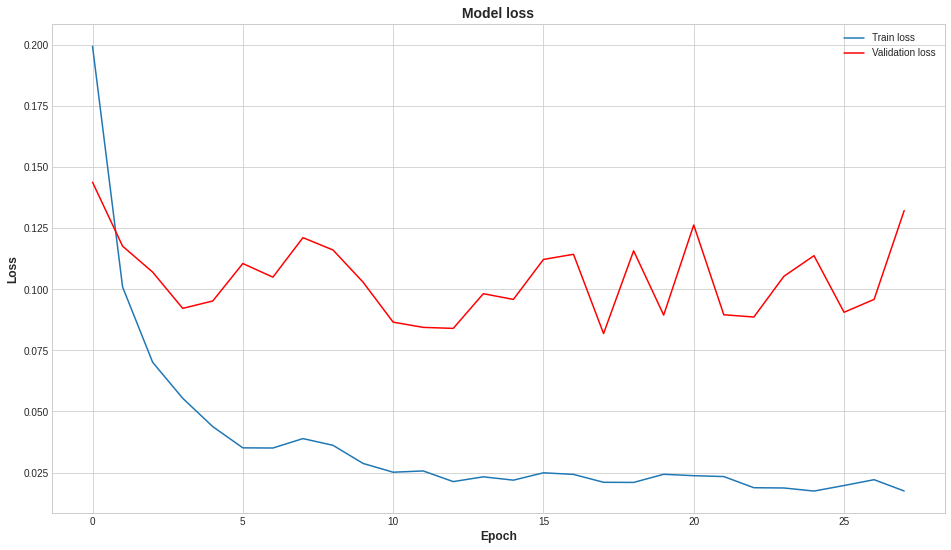

<Figure size 1152x648 with 0 Axes>

In [63]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [64]:
# Check the model summary
Trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 2, 43, 64)         1216      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2, 1344)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               578000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [65]:
# reshape for Hybrid CNN LSTM
x_test_multi_CNN_LSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_LSTM.shape)

(959, 2, 45, 6)


In [66]:
# predictions for hybrid CNN LSTM

predictions = []
for i in x_test_multi_CNN_LSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.57419217]]


In [67]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(959, 1)


In [68]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[696.9475]
(959, 1)


In [69]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.80040224]
KGE' is : [0.87055436]
r is : [0.90278061], gamma is : [0.96813235]
KGE is : [0.8340359]
alpha is : [0.89135629], beta is : [0.92069667]
PBIAS is : [7.93033294]
RMSE is : 456.8802790054188
MARE is : [0.20443761]
MSE is : 208739.58934406933
MAE is : 317.23379591872674
MAPE is : inf
R2 is : 0.8004022419385952



<ipython-input-69-aa673699247f>:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


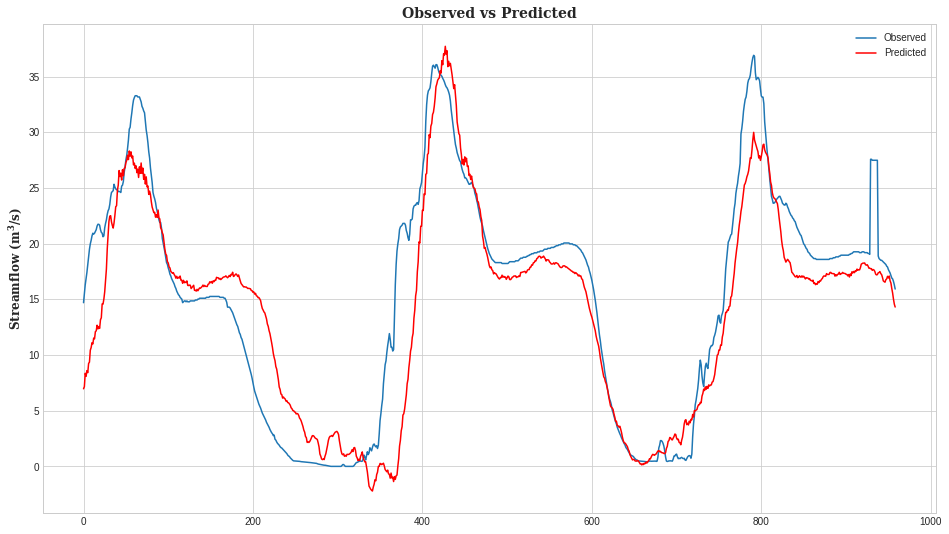

<Figure size 1152x648 with 0 Axes>

In [70]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['Q'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold',family='serif')
plt.ylabel("Streamflow (m$\mathregular{^{3}}$/s)",size=12,fontweight='semibold',family='serif')
plt.legend(('Observed','Predicted'))  # plt.legend(('Observed','predicted'), loc=' upper left ')
plt.figure(figsize=(16,9))
plt.show()

In [71]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_LSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined_history.csv', index=False)

In [72]:
# Hybrid CNN GRU Model

In [73]:
# tensorflow version
tf.__version__

'2.4.1'

In [74]:
# reshape input feature for Hybrid CNN GRU 
x_train_multi_CNN_GRU = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_GRU.shape)

x_val_multi_CNN_GRU = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_GRU.shape)
print(len(x_val_multi_CNN_GRU))

(4810, 2, 45, 6)
(959, 2, 45, 6)
959


In [75]:
# Prepare  CNN GRU training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_GRU, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_GRU, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [76]:
# Define the CNN GRU model

CNN_GRU_model = Sequential()
CNN_GRU_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_GRU.shape[2], x_train_multi_CNN_GRU.shape[3]))))
CNN_GRU_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_GRU_model.add(TimeDistributed(Dropout(0.2)))
CNN_GRU_model.add(TimeDistributed(Flatten()))
CNN_GRU_model.add(GRU(units=100,activation='relu'))
CNN_GRU_model.add(Dropout(0.2))
CNN_GRU_model.add(Dense(horizon))
CNN_GRU_model.compile(optimizer='adam', loss='mse')

In [77]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_GRU_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined.h5'

In [78]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 3s 11ms/step - loss: 0.2828 - val_loss: 0.1809
Epoch 2/500
150/150 [==============================] - 1s 9ms/step - loss: 0.1059 - val_loss: 0.1228
Epoch 3/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0676 - val_loss: 0.1218
Epoch 4/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0538 - val_loss: 0.1115
Epoch 5/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0408 - val_loss: 0.1246
Epoch 6/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0395 - val_loss: 0.1212
Epoch 7/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0333 - val_loss: 0.1114
Epoch 8/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0387 - val_loss: 0.1357
Epoch 9/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0371 - val_loss: 0.1209
Epoch 10/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0236 - val_l

In [79]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

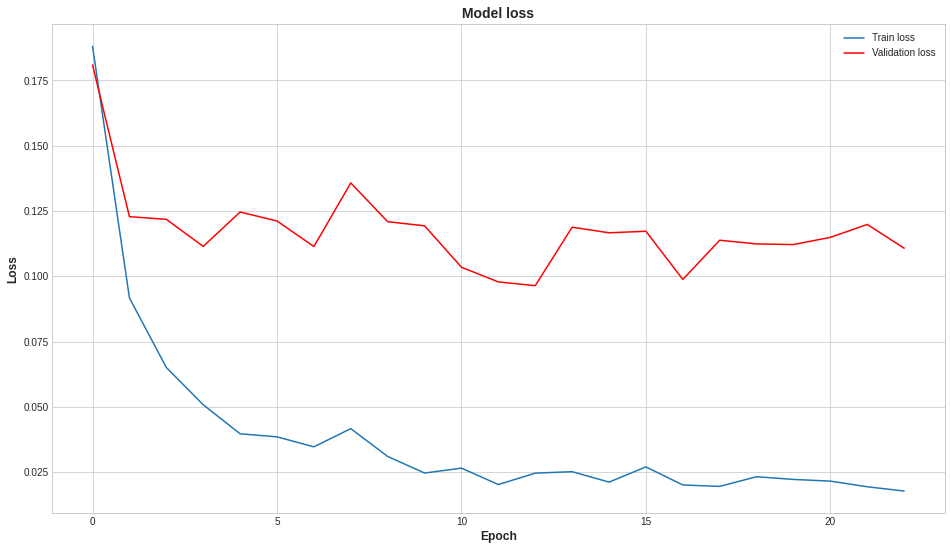

<Figure size 1152x648 with 0 Axes>

In [80]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [81]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 2, 43, 64)         1216      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 1344)           0         
_________________________________________________________________
gru (GRU)                    (None, 100)               433800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [82]:
# reshape for Hybrid CNN GRU
x_test_multi_CNN_GRU = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_GRU.shape)
print(len(x_test_multi_CNN_GRU))

(959, 2, 45, 6)
959


In [83]:
# predictions for hybrid CNN GRU

predictions = []
for i in x_test_multi_CNN_GRU:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.55546445]]


In [84]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(959, 1)


In [85]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[713.3905]
(959, 1)


In [86]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.79487023]
KGE' is : [0.83091069]
r is : [0.90302449], gamma is : [0.88400188]
KGE is : [0.7795546]
alpha is : [0.81707776], beta is : [0.92429412]
PBIAS is : [7.57058789]
RMSE is : 463.1684094368422
MARE is : [0.22851648]
MSE is : 214524.97550025428
MAE is : 354.59790609729134
MAPE is : inf
R2 is : 0.7948702290131956



<ipython-input-86-aa673699247f>:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


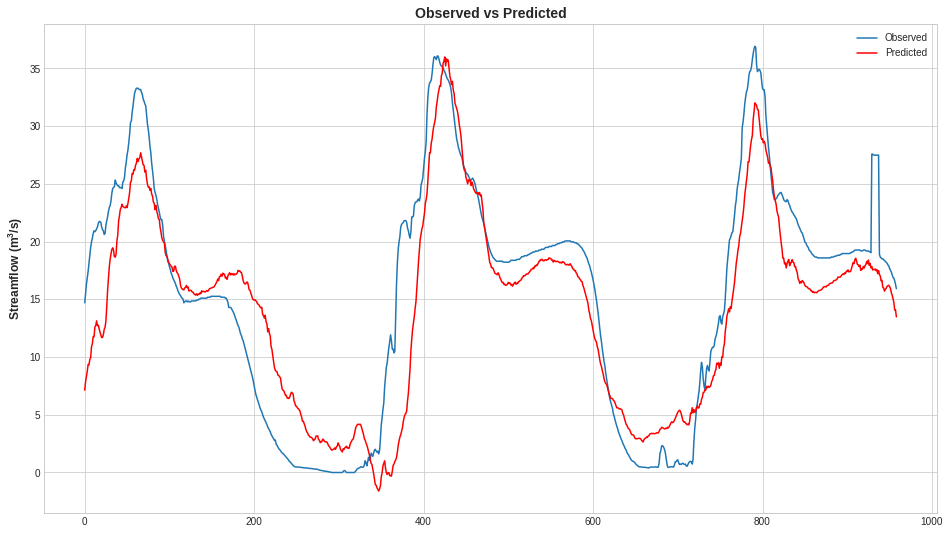

<Figure size 1152x648 with 0 Axes>

In [87]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['Q'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Streamflow (m$\mathregular{^{3}}$/s)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [88]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_GRU_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined_history.csv', index=False)

In [89]:
# Auto-encoder LSTM Model

In [90]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [91]:
# Define the auto-encoder LSTM Model.
ED_lstm_model = Sequential([
    LSTM(40, activation='relu',input_shape=x_train_multi.shape[-2:], 
    return_sequences=True),
    LSTM(units=20,activation='relu',return_sequences=True),
    LSTM(units=15),
    RepeatVector(y_train_multi.shape[1]),
    LSTM(units=40,activation='relu',return_sequences=True),
    LSTM(units=25,activation='relu',return_sequences=True),
    TimeDistributed(tf.keras.layers.Dense(units=1))
])
ED_lstm_model.compile(optimizer='adam', loss='mse')

In [92]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/ED_LSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined.h5'

In [93]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = ED_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 36s 209ms/step - loss: 0.7657 - val_loss: 0.2701
Epoch 2/500
150/150 [==============================] - 31s 204ms/step - loss: 0.1653 - val_loss: 0.1838
Epoch 3/500
150/150 [==============================] - 31s 204ms/step - loss: 0.1197 - val_loss: 0.1381
Epoch 4/500
150/150 [==============================] - 31s 204ms/step - loss: 0.0971 - val_loss: 0.1433
Epoch 5/500
150/150 [==============================] - 31s 204ms/step - loss: 0.0783 - val_loss: 0.1392
Epoch 6/500
150/150 [==============================] - 31s 205ms/step - loss: 0.0718 - val_loss: 0.1446
Epoch 7/500
150/150 [==============================] - 30s 203ms/step - loss: 0.0644 - val_loss: 0.1516
Epoch 8/500
150/150 [==============================] - 30s 203ms/step - loss: 0.0593 - val_loss: 0.1217
Epoch 9/500
150/150 [==============================] - 31s 204ms/step - loss: 0.0613 - val_loss: 0.1207
Epoch 10/500
150/150 [==============================] - 31s 205m

In [94]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

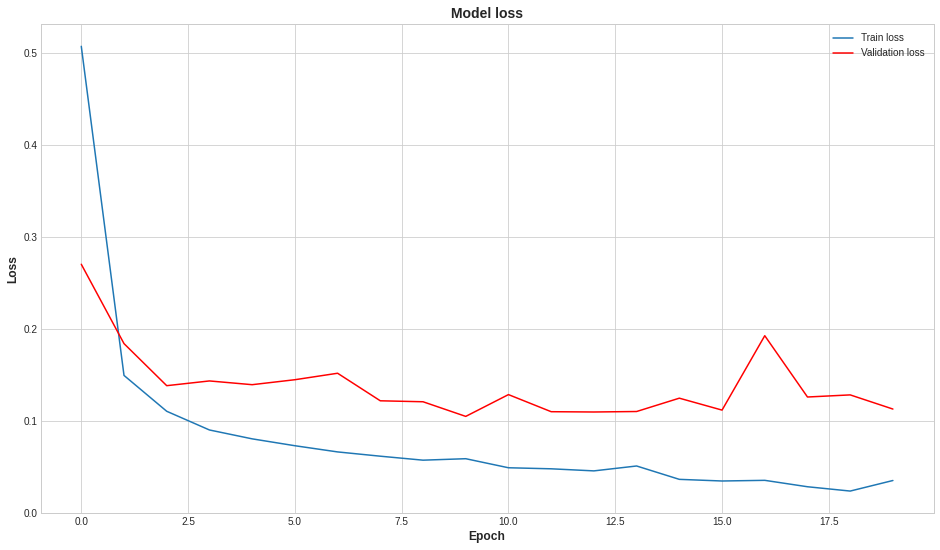

<Figure size 1152x648 with 0 Axes>

In [95]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [96]:
# Check the model summary
Trained_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 90, 40)            7520      
_________________________________________________________________
lstm_4 (LSTM)                (None, 90, 20)            4880      
_________________________________________________________________
lstm_5 (LSTM)                (None, 15)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 15)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 40)             8960      
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 1)             

In [97]:
# predictions for AutoEncoder

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[[-0.41376442]]]


In [98]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(959, 1)


In [99]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[837.80334]
(959, 1)
959


In [100]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81459368]
KGE' is : [0.8538488]
r is : [0.92193763], gamma is : [0.94812181]
KGE is : [0.79096444]
alpha is : [0.84180063], beta is : [0.88786128]
PBIAS is : [11.21387204]
RMSE is : 440.33869922513213
MARE is : [0.19654032]
MSE is : 193898.17003528136
MAE is : 304.9792599270063
MAPE is : inf
R2 is : 0.8145936755319635



<ipython-input-100-116afa56ab94>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


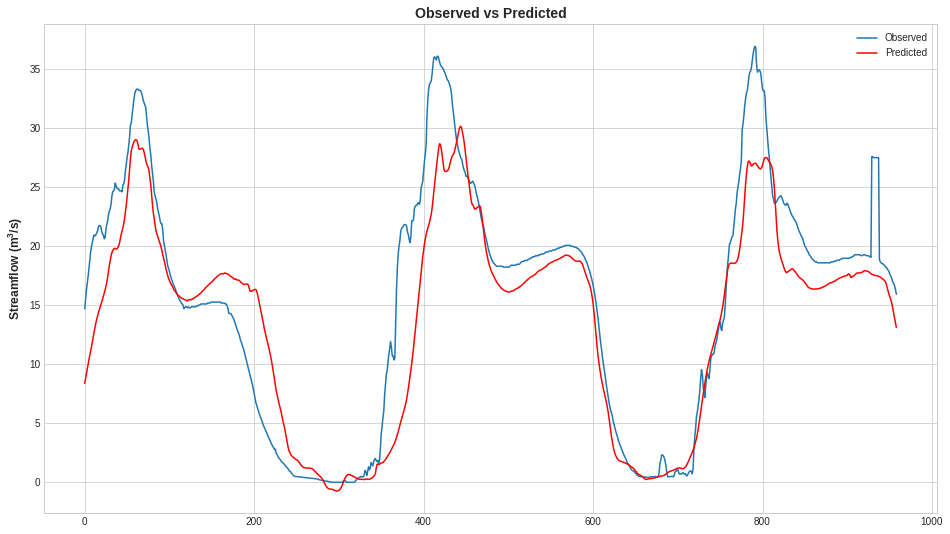

<Figure size 1152x648 with 0 Axes>

In [101]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['Q'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Streamflow (m$\mathregular{^{3}}$/s)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [102]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/ED_LSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined_history.csv', index=False)

In [103]:
# CNN Model

In [104]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [105]:
# Define the CNN model

CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
CNN_model.add(MaxPool1D(pool_size=2))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30, activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(horizon))
CNN_model.compile(optimizer='adam', loss='mse')

In [106]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined.h5'

In [107]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 4s 15ms/step - loss: 0.3081 - val_loss: 0.1994
Epoch 2/500
150/150 [==============================] - 1s 5ms/step - loss: 0.1238 - val_loss: 0.1277
Epoch 3/500
150/150 [==============================] - 1s 5ms/step - loss: 0.1013 - val_loss: 0.2248
Epoch 4/500
150/150 [==============================] - 1s 5ms/step - loss: 0.1189 - val_loss: 0.1339
Epoch 5/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0892 - val_loss: 0.1276
Epoch 6/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0818 - val_loss: 0.1473
Epoch 7/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0778 - val_loss: 0.1536
Epoch 8/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0650 - val_loss: 0.1419
Epoch 9/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0674 - val_loss: 0.1725
Epoch 10/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0634 - val_l

In [108]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

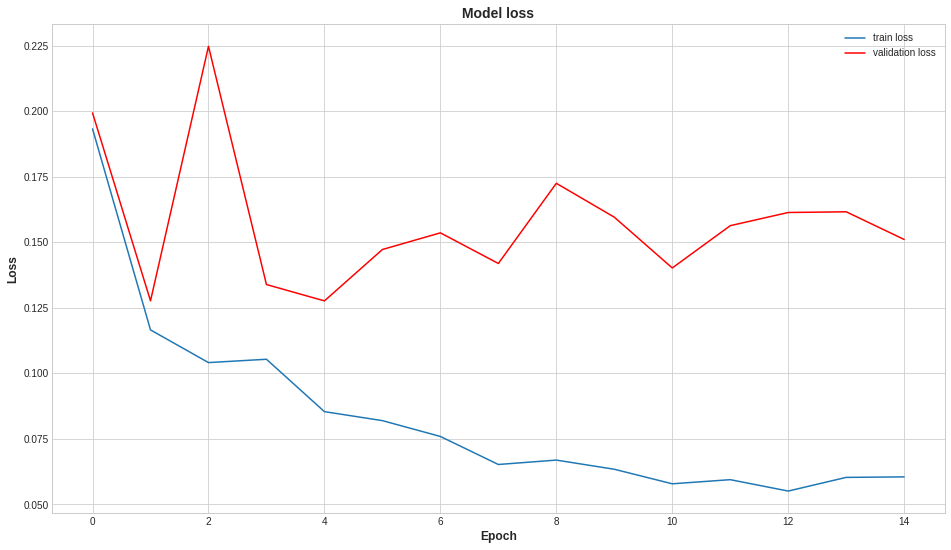

<Figure size 1152x648 with 0 Axes>

In [109]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [110]:
# Check the model summary
Trained_model.summary()

# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(y_test_multi))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 88, 64)            1216      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 44, 64)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 44, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2816)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                84510     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [111]:
# predictions for CNN

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.53795767]]


In [112]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(959, 1)


In [113]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[728.7615]
(959, 1)
959


In [114]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.73621848]
KGE' is : [0.78694807]
r is : [0.88554113], gamma is : [1.12169954]
KGE is : [0.82311605]
alpha is : [0.97339952], beta is : [0.86778989]
PBIAS is : [13.22101052]
RMSE is : 525.226661204369
MARE is : [0.25049172]
MSE is : 275863.045639889
MAE is : 388.69775180582405
MAPE is : inf
R2 is : 0.7362184834475567



<ipython-input-114-116afa56ab94>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


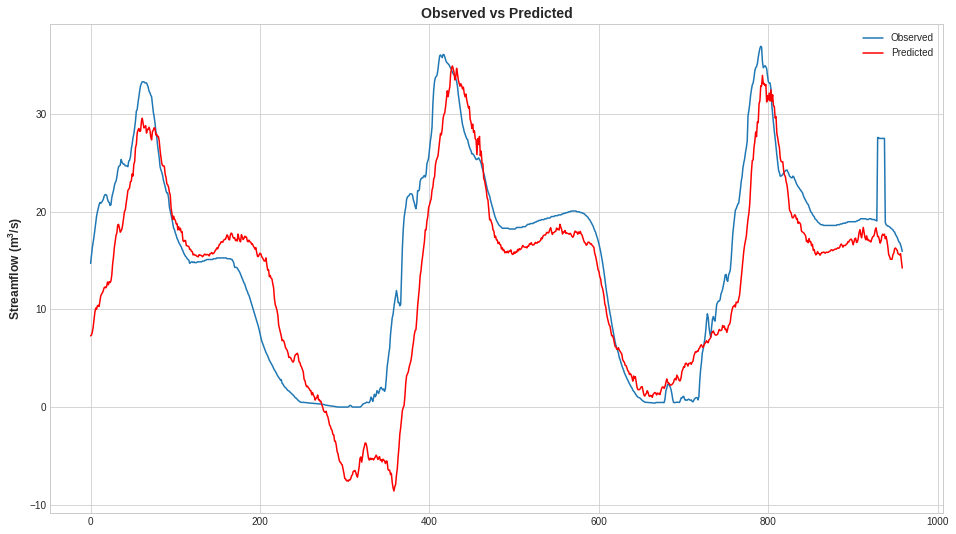

<Figure size 1152x648 with 0 Axes>

In [115]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['Q'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Streamflow (m$\mathregular{^{3}}$/s)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [116]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/CNN_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined_history.csv', index=False)

In [117]:
# LSTM Model

In [118]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [119]:
# Define the LSTM model

lstm_multi = Sequential()
lstm_multi.add(LSTM(
    150,activation='relu',input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(LSTM(units=100,activation='relu',return_sequences=False)),
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [120]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/LSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined.h5'

In [121]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 32s 203ms/step - loss: 0.3028 - val_loss: 0.1797
Epoch 2/500
150/150 [==============================] - 30s 199ms/step - loss: 10451675735.3475 - val_loss: 0.1897
Epoch 3/500
150/150 [==============================] - 30s 200ms/step - loss: 0.1265 - val_loss: 0.1590
Epoch 4/500
150/150 [==============================] - 30s 200ms/step - loss: 0.0862 - val_loss: 0.1427
Epoch 5/500
150/150 [==============================] - 30s 200ms/step - loss: 170.3863 - val_loss: 0.1487
Epoch 6/500
150/150 [==============================] - 30s 199ms/step - loss: 0.0731 - val_loss: 0.1291
Epoch 7/500
150/150 [==============================] - 30s 201ms/step - loss: 0.0609 - val_loss: 0.1251
Epoch 8/500
150/150 [==============================] - 30s 197ms/step - loss: 0.0568 - val_loss: 0.1244
Epoch 9/500
150/150 [==============================] - 30s 197ms/step - loss: 0.0570 - val_loss: 0.1330
Epoch 10/500
150/150 [==============================

In [122]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

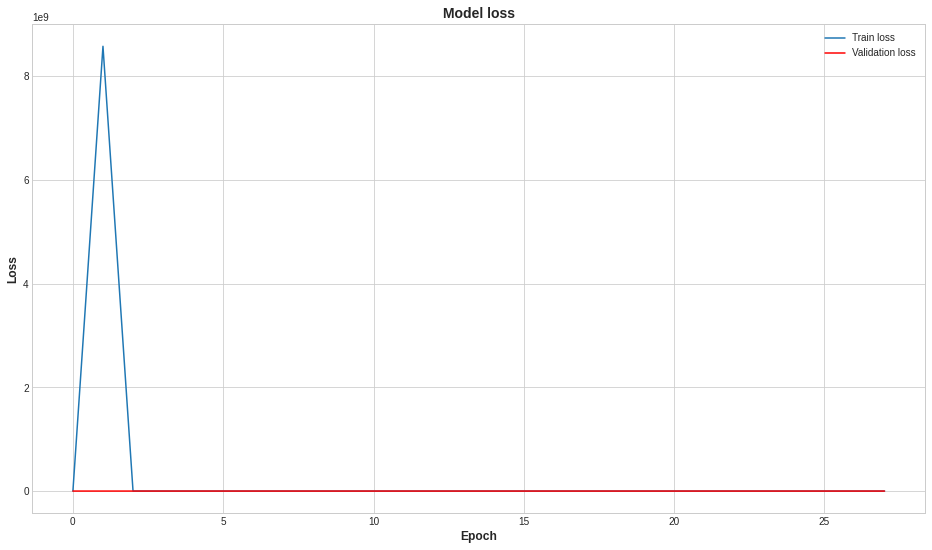

<Figure size 1152x648 with 0 Axes>

In [123]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [124]:
# Check the model summary
Trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 90, 150)           94200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 90, 150)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 194,701
Trainable params: 194,701
Non-trainable params: 0
_________________________________________________________________


In [125]:
# predictions for LSTM

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.44026646]]


In [126]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(959, 1)


In [127]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[814.53455]
(959, 1)
959


In [128]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.7884617]
KGE' is : [0.84600538]
r is : [0.90759712], gamma is : [0.96445677]
KGE is : [0.78847597]
alpha is : [0.85069698], beta is : [0.88204776]
PBIAS is : [11.79522381]
RMSE is : 470.34777390736195
MARE is : [0.22054118]
MSE is : 221227.0284196109
MAE is : 342.22233567669895
MAPE is : inf
R2 is : 0.7884616951010803



<ipython-input-128-aa673699247f>:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


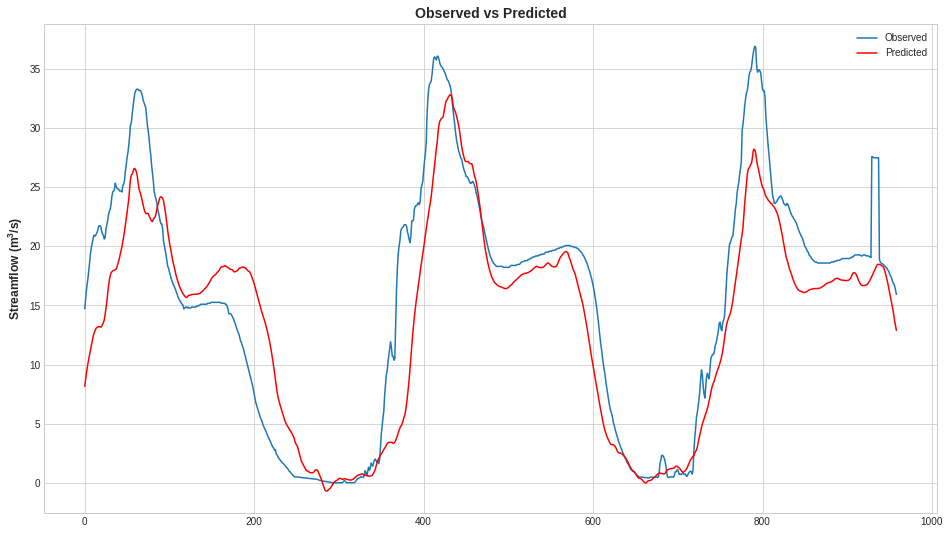

<Figure size 1152x648 with 0 Axes>

In [129]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['Q'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Streamflow (m$\mathregular{^{3}}$/s)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [130]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/LSTM_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined_history.csv', index=False)

In [131]:
#  GRU Model

In [132]:
# # Define the GRU model

GRU_model = Sequential([
    GRU(100, activation='relu', input_shape=x_train_multi.shape[-2:],return_sequences=True),
    Dropout(0.2),
    GRU(units=50,activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(units=horizon),
])
GRU_model.compile(optimizer='adam', loss='mse')

In [133]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/GRU_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined.h5'

In [134]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 37s 234ms/step - loss: 0.3234 - val_loss: 0.1868
Epoch 2/500
150/150 [==============================] - 35s 235ms/step - loss: 0.1348 - val_loss: 0.1691
Epoch 3/500
150/150 [==============================] - 35s 235ms/step - loss: 0.1092 - val_loss: 0.1594
Epoch 4/500
150/150 [==============================] - 35s 233ms/step - loss: 0.0880 - val_loss: 0.1306
Epoch 5/500
150/150 [==============================] - 35s 235ms/step - loss: 0.0663 - val_loss: 0.1125
Epoch 6/500
150/150 [==============================] - 35s 233ms/step - loss: 0.0503 - val_loss: 0.1085
Epoch 7/500
150/150 [==============================] - 35s 233ms/step - loss: 0.0436 - val_loss: 0.1048
Epoch 8/500
150/150 [==============================] - 35s 234ms/step - loss: 0.0428 - val_loss: 0.1078
Epoch 9/500
150/150 [==============================] - 35s 234ms/step - loss: 0.0424 - val_loss: 0.0962
Epoch 10/500
150/150 [==============================] - 35s 233m

In [135]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

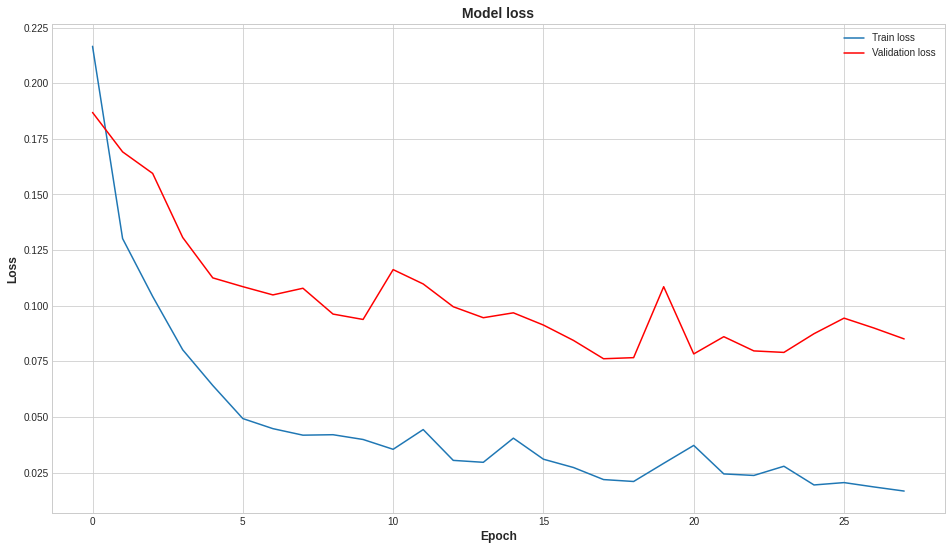

<Figure size 1152x648 with 0 Axes>

In [136]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [137]:
# Check the model summary
Trained_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 90, 100)           32400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 90, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 55,251
Trainable params: 55,251
Non-trainable params: 0
_________________________________________________________________


In [138]:
# predictions for GRU

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.51069534]]


In [139]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(959, 1)


In [140]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[752.6978]
(959, 1)
959


In [141]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.82397291]
KGE' is : [0.83874997]
r is : [0.91886955], gamma is : [0.87786466]
KGE is : [0.79057229]
alpha is : [0.81896013], beta is : [0.93290022]
PBIAS is : [6.70997809]
RMSE is : 429.05635793043416
MARE is : [0.20601901]
MSE is : 184089.35828052883
MAE is : 319.68771174217585
MAPE is : inf
R2 is : 0.8239729065712076



<ipython-input-141-116afa56ab94>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


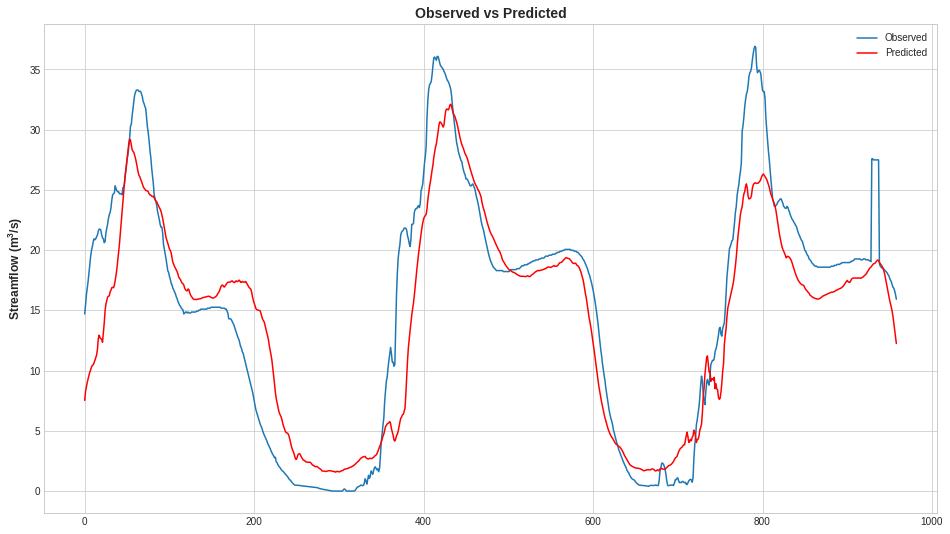

<Figure size 1152x648 with 0 Axes>

In [142]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['Q'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Streamflow (m$\mathregular{^{3}}$/s)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [143]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_q/jide_q_70_30_split/GRU_Multi_Jiderebode_Q_1step_90days_gpm_relu_standard_trainvalcombined_history.csv', index=False)